<a href="https://colab.research.google.com/github/SaraLis98/TFT/blob/main/Training_Frank's_Sign_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Preprocessing Images

In [ ]:
import keras
import os
import numpy as np
import pandas as pd
import csv
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from keras.models import load_model
import pickle
import seaborn as sns


def loadImages(path):
  with open("/content/drive/MyDrive/TFG/3_Segmented_all_ears/ears_df.csv", mode='r') as ears_df:
    csv_reader = csv.reader(ears_df, delimiter=',')
    
    line_count = 0
    
    images = []
    labels = []
    for row in csv_reader:
        if line_count != 0:
            filename = row[0]
            
            image_path = os.path.join(path, filename)
            

            # Save and resize image
            image = tf.keras.preprocessing.image.load_img(
                image_path, target_size=(224,224))
            
            
            images.append(tf.keras.preprocessing.image.img_to_array(image))
            
            labels.append(row[2])

        line_count += 1
        print(line_count, " ficheros procesados")
        
        
    images = np.array(images)/ 255.0
    labels = np.array(labels, dtype='float32')

    # Lote de train y val
    X_train, X_val, y_train, y_val= train_test_split(images, labels, 
      test_size = 0.33, random_state = 42)

    # Lote de train y test
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
      test_size = 0.20, random_state = 42)
    
    return X_train, X_val, y_train, y_val, X_test, y_test, labels, images



In [ ]:
X_train, X_val, y_train, y_val, X_test, y_test, labels, images = loadImages("/content/drive/MyDrive/TFG/3_Segmented_all_ears/hard_aug_ears")

## Predict Function

In [ ]:
def save_predict(path):
  out_dict = {}
  cols = ['filename', 'augmented', 'label', 'Feature']
  for i in cols:
    out_dict[i] = []

  with open("/content/drive/MyDrive/TFG/3_Segmented_all_ears/ears_df.csv", mode='r') as ears:
    csv_reader = csv.reader(ears, delimiter=',')
    line_count = 0
    
    for row in csv_reader:

      if line_count != 0:
        out_dict['filename'].append(row[0])
        out_dict['augmented'].append(row[1])
        out_dict['label'].append(row[2])

      line_count += 1

    preds = model.predict(images)
    for p in preds:
      out_dict['Feature'].append(round(p[0]))

    pd.DataFrame.from_dict(out_dict).to_csv(path, index=False)


## Graphics Function

In [ ]:
def generate_accuracy_graphs(title, path):
  # ACCURACY --------------------------------------

  #grafica que muestra la precisión tanto del entrenamiento como de la validación
  plt.plot(graphic.history['accuracy'], label='accuracy')                         #toma los valores de accuracy
  plt.plot(graphic.history['val_accuracy'], label='validation accuracy')          #toma los valores del val_accuracy

  plt.title(title)                          #titulo 
  plt.xlabel('Epoch')                                                             #colocar etiqueta en el eje x para las epocas
  plt.ylabel('Accuracy')                                                          #colocar etiqueta en el eje y para la presición
  plt.legend(loc="lower right")                                                   #posición de la leyenda

  plt.savefig(path)
  plt.show()

In [ ]:
def generate_loss_graphs(title, path):
  # LOSS --------------------------------------

  #grafica que muestra la precisión tanto del entrenamiento como de la validación
  plt.plot(graphic.history['loss'], label='loss')                         #toma los valores de accuracy
  plt.plot(graphic.history['val_loss'], label='validation loss')          #toma los valores del val_accuracy

  plt.title(title)                          #titulo 
  plt.xlabel('Epoch')                       #colocar etiqueta en el eje x para las epocas
  plt.ylabel('Loss')                        #colocar etiqueta en el eje y para la presición
  plt.legend(loc="upper right")             #posición de la leyenda

  plt.savefig(path)
  plt.show()

In [ ]:
def generate_confusion_matrix(title, model, savePath):

  lista = []
  predicts_labels = model.predict(X_test)
  for i in predicts_labels:
    lista.append(round(i[0]))
  
  confusion = confusion_matrix(y_test, lista)
  confusion = confusion.astype(np.float64)
  trues = list(y_test).count(1)
  falses = list(y_test).count(0)

  confusion[0][0] = confusion[0][0]/falses
  confusion[0][1] = confusion[0][1]/falses
  confusion[1][0] = confusion[1][0]/trues
  confusion[1][1] = confusion[1][1]/trues

  labels = ['Orejas sanas', 'Orejas con signo']
  fig, ax = plt.subplots(figsize=(10,8))

  cf = sns.heatmap(confusion, annot=True, fmt='.2%', cmap='Purples', xticklabels = labels, yticklabels = labels, ax=ax )

  plt.title(f"Confusion Matrix {title}")
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  cf.plot()
  plt.savefig(savePath)



## Inference time evaluation

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/MobileNet_Model_HardAug.h")

In [ ]:
import time
def generate_time_inference_not_in_memo(title):
  average_time = 0
  for i in X_test: 
    start_time = time.time()
    model.predict(np.array([i]), verbose = 0)
    average_time += (time.time() - start_time)
  #print(average_time)
  #print(X_test.shape[0])
  print(f"{title} %s seconds ---" % (average_time/X_test.shape[0]))

In [ ]:
generate_time_inference_not_in_memo("Not in memo Inference time InceptionV3 Hard:")

Not in memo Inference time InceptionV3 Hard: 0.06660709878672724 seconds ---


In [ ]:
generate_time_inference_not_in_memo("Not in memo Inference time MobileNet Hard:")

Not in memo Inference time MobileNet Hard: 0.04544158396513566 seconds ---


In [ ]:
import time
def generate_time_inference_in_memo(title, modelfile):

  average_time = 0
  for i in X_test: 
    # Se carga el modelo por cada inferencia
    model = load_model(modelfile)
    start_time = time.time()
    model.predict(np.array([i]), verbose = 0)
    average_time += (time.time() - start_time)

  print(f"{title} %s seconds ---" % (average_time/X_test.shape[0]))

In [ ]:
generate_time_inference_in_memo("In memo Inference time InceptionV3:", "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/InceptionV3_Model_HardAug.h")

In memo Inference time InceptionV3: 1.2893860887444537 seconds ---


In [ ]:
generate_time_inference_in_memo("In memo Inference time MobileNet:", "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/MobileNet_Model_HardAug.h")

In memo Inference time MobileNet: 0.42622849257096 seconds ---


## Evaluate Function

In [ ]:
def evaluate(modelName, model):
  _, acc = model.evaluate(images, labels, verbose=0)
  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)

  print(modelName,"accuracy : {:5.2f}%".format(acc * 100))
  print(modelName,"accuracy train : {:5.2f}%".format(train_acc* 100))
  print(modelName,"accuracy test : {:5.2f}%".format(test_acc * 100))


## Evaluate CheckPoint - Mejor tasa del modelo


In [ ]:
def evaluate_CheckPoint(modelName, pathModel_h5):

  saved_model = load_model(pathModel_h5)
  _, acc = saved_model.evaluate(images, labels, verbose=0)
  _, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
  print(modelName,"accuracy: {:5.2f}%".format(acc * 100))
  print(modelName,"accuracy train: {:5.2f}%".format(train_acc* 100))
  print(modelName,"accuracy test: {:5.2f}%".format(test_acc * 100))

# MODELS WITH HARD AUGMENTATION

## Xception 

In [ ]:
Xception_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Xception_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Xception_hard.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.8776 - accuracy: 0.5637
Epoch 1: val_accuracy improved from -inf to 0.70833, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Xception_hard.h5
72/72 [==============================] - 43s 534ms/step - loss: 0.8776 - accuracy: 0.5637 - val_loss: 0.6805 - val_accuracy: 0.7083
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.4970 - accuracy: 0.8199
Epoch 2: val_accuracy did not improve from 0.70833
72/72 [==============================] - 31s 435ms/step - loss: 0.4970 - accuracy: 0.8199 - val_loss: 1.0434 - val_accuracy: 0.6596
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.2691 - accuracy: 0.9130
Epoch 3: val_accuracy improved from 0.70833 to 0.76836, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Xception_hard.h5
72/72 [==============================] - 42s 581m

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Xception_Model_HardAug")

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Xception_Model_HardAug")

In [ ]:
evaluate("Xception Hard_Aug", model)

Xception Hard_Aug accuracy : 97.76%
Xception Hard_Aug accuracy train : 99.52%
Xception Hard_Aug accuracy test : 95.83%


In [ ]:
evaluate_CheckPoint("Xception Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Xception_hard.h5")

Xception Hard_Aug CheckPoint accuracy mc: 99.04%
Xception Hard_Aug CheckPoint accuracy train mc: 100.00%
Xception Hard_Aug CheckPoint accuracy test mc: 97.91%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/Xception_aug_hard.csv")

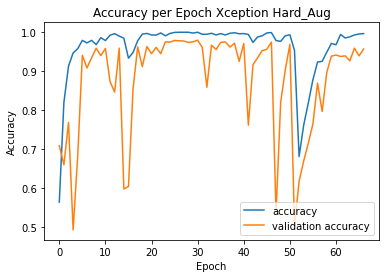

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Xception Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_Xception.svg")

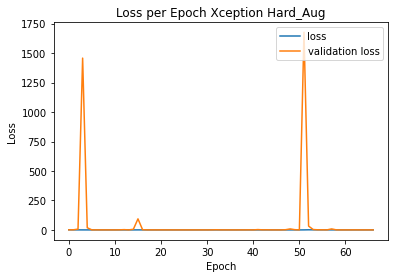

In [ ]:
generate_loss_graphs('Loss per Epoch Xception Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_Xception.svg")

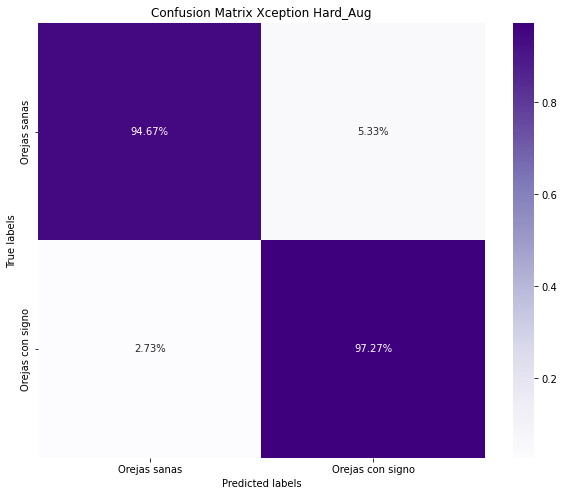

In [ ]:
generate_confusion_matrix("Xception Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_Xception.svg")

## VGG X

### VGG16

In [ ]:
Vgg16_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Vgg16_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Vgg16.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.8767 - accuracy: 0.6029
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Vgg16.h5
72/72 [==============================] - 64s 620ms/step - loss: 0.8767 - accuracy: 0.6029 - val_loss: 22.2762 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.8624 - accuracy: 0.6385
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 36s 500ms/step - loss: 0.8624 - accuracy: 0.6385 - val_loss: 3172.9990 - val_accuracy: 0.4958
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.6524 - accuracy: 0.7003
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 36s 508ms/step - loss: 0.6524 - accuracy: 0.7003 - val_loss: 3663.9741 - val_accuracy: 0.4831
Epoch 4/300
72/72 [=========================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Vgg16_Model_HardAug")

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Vgg16_Model_HardAug")

In [ ]:
evaluate("Vgg16 Hard_Aug", model)

Vgg16 Hard_Aug accuracy : 91.98%
Vgg16 Hard_Aug accuracy train : 96.48%
Vgg16 Hard_Aug accuracy test : 85.91%


In [ ]:
evaluate_CheckPoint("Vgg16 CheckPoint Hard_Aug","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Vgg16.h5")

Vgg16 CheckPoint Hard_Aug accuracy mc: 94.91841197013855%
Vgg16 CheckPoint Hard_Aug accuracy train mc: 99.69552159309387%
Vgg16 CheckPoint Hard_Aug accuracy test mc: 88.6956512928009%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/Vgg16_aug_hard.csv")

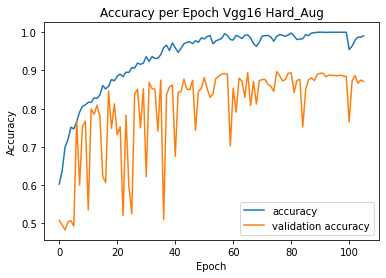

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Vgg16 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_Vgg16.svg")

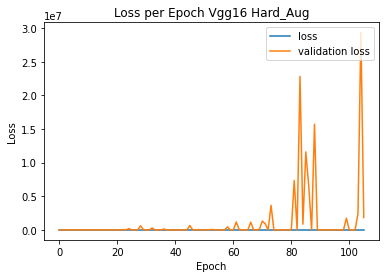

In [ ]:
generate_loss_graphs('Loss per Epoch Vgg16 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_Vgg16.svg")

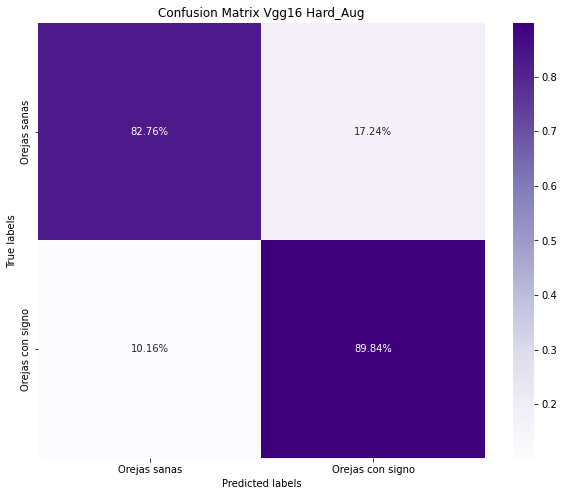

In [ ]:
generate_confusion_matrix("Vgg16 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_Vgg16.svg")

### VGG19

In [ ]:
Vgg19_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

model = Sequential()
model.add(Vgg19_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Vgg19.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 1.0111 - accuracy: 0.5876
Epoch 1: val_accuracy improved from -inf to 0.51130, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Vgg19.h5
72/72 [==============================] - 43s 384ms/step - loss: 1.0111 - accuracy: 0.5876 - val_loss: 1796.7627 - val_accuracy: 0.5113
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.8934 - accuracy: 0.6255
Epoch 2: val_accuracy improved from 0.51130 to 0.51766, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Vgg19.h5
72/72 [==============================] - 24s 340ms/step - loss: 0.8934 - accuracy: 0.6255 - val_loss: 4.8706 - val_accuracy: 0.5177
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.7560 - accuracy: 0.6659
Epoch 3: val_accuracy improved from 0.51766 to 0.54237, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES 

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Vgg19_Model_HardAug")

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Vgg19_Model_HardAug")

In [ ]:
evaluate("Vgg19 Hard_Aug", model)

Vgg19 Hard_Aug accuracy : 93.50%
Vgg19 Hard_Aug accuracy train : 98.26%
Vgg19 Hard_Aug accuracy test : 88.35%


In [ ]:
evaluate_CheckPoint("Vgg19 Hard_Aug CheckPoint ","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_Vgg19.h5")

Vgg19 Hard_Aug CheckPoint  accuracy mc: 95.71%
Vgg19 Hard_Aug CheckPoint  accuracy train mc: 99.91%
Vgg19 Hard_Aug CheckPoint  accuracy test mc: 92.52%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/Vgg19_aug_hard.csv")

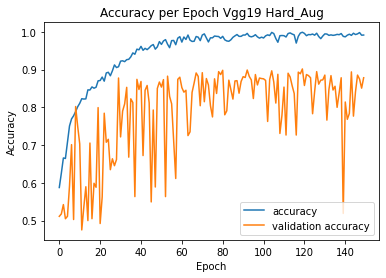

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Vgg19 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_Vgg19.svg")

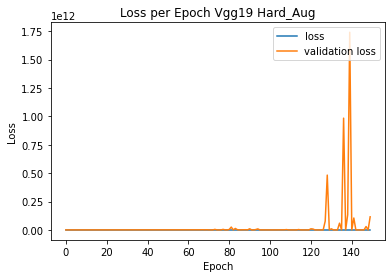

In [ ]:
generate_loss_graphs('Loss per Epoch Vgg19 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_Vgg19.svg")

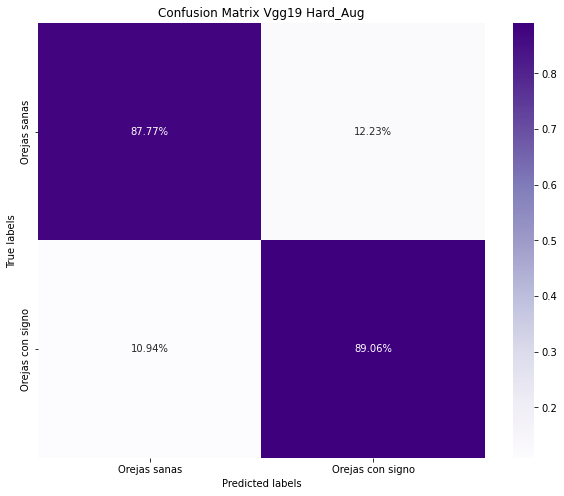

In [ ]:
generate_confusion_matrix("Vgg19 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_Vgg19.svg")

## ResNet X

### ResNet50

In [ ]:
Resnet50_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

model = Sequential()
model.add(Resnet50_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet50.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 3.7772 - accuracy: 0.6390
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet50.h5
72/72 [==============================] - 65s 672ms/step - loss: 3.7772 - accuracy: 0.6390 - val_loss: 0.6948 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.5555 - accuracy: 0.7508
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 29s 397ms/step - loss: 0.5555 - accuracy: 0.7508 - val_loss: 0.8255 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.3972 - accuracy: 0.8138
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 29s 397ms/step - loss: 0.3972 - accuracy: 0.8138 - val_loss: 0.9011 - val_accuracy: 0.5078
Epoch 4/300
72/72 [=============================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet50_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet50_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet50_Model_HardAug.h")

In [ ]:
evaluate("Resnet50 Hard_Aug", model)

Resnet50 Hard_Aug accuracy : 88.14%
Resnet50 Hard_Aug accuracy train : 91.69%
Resnet50 Hard_Aug accuracy test : 84.70%


In [ ]:
evaluate_CheckPoint("Resnet50 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet50.h5")

Resnet50 Hard_Aug CheckPoint accuracy: 96.34%
Resnet50 Hard_Aug CheckPoint accuracy train: 99.70%
Resnet50 Hard_Aug CheckPoint accuracy test: 92.52%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/Resnet50_aug_hard.csv")

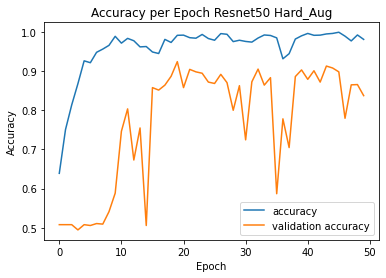

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Resnet50 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_Resnet50.svg")

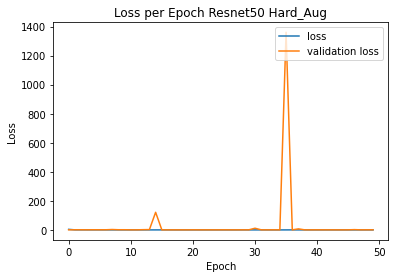

In [ ]:
generate_loss_graphs('Loss per Epoch Resnet50 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_Resnet50.svg")

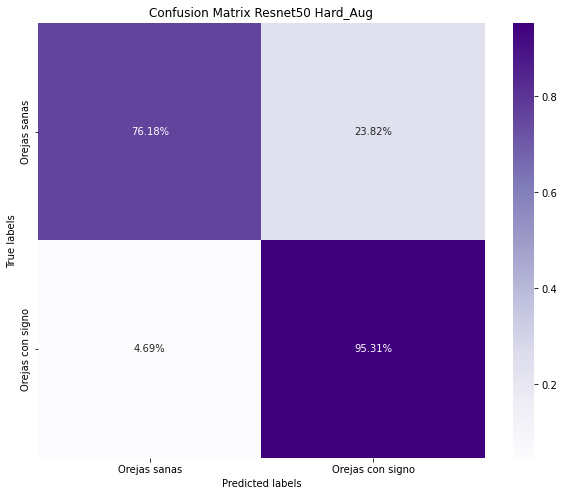

In [ ]:
generate_confusion_matrix("Resnet50 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_Resnet50.svg")

### ResNet101

In [ ]:
Resnet101_model = tf.keras.applications.ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Resnet101_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet101.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 3.8042 - accuracy: 0.6694
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet101.h5
72/72 [==============================] - 47s 497ms/step - loss: 3.8042 - accuracy: 0.6694 - val_loss: 0.8939 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.7221
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 25s 346ms/step - loss: 0.5591 - accuracy: 0.7221 - val_loss: 0.6971 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.7756
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 25s 345ms/step - loss: 0.4732 - accuracy: 0.7756 - val_loss: 0.7412 - val_accuracy: 0.4922
Epoch 4/300
72/72 [============================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet101_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet101_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet101_Model_HardAug.h")

In [ ]:
evaluate("Resnet101 Hard_Aug", model)

Resnet101 Hard_Aug accuracy : 93.75%
Resnet101 Hard_Aug accuracy train : 99.17%
Resnet101 Hard_Aug accuracy test : 88.17%


In [ ]:
evaluate_CheckPoint("Resnet101 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet101.h5")

Resnet101 Hard_Aug CheckPoint accuracy mc: 94.45%
Resnet101 Hard_Aug CheckPoint accuracy train mc: 98.87%
Resnet101 Hard_Aug CheckPoint accuracy test mc: 89.74%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/Resnet101_aug_hard.csv")

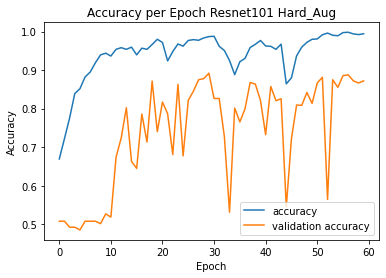

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Resnet101 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_Resnet101.svg")

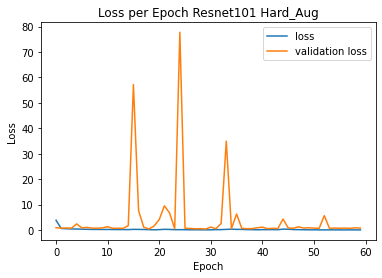

In [ ]:
generate_loss_graphs('Loss per Epoch Resnet101 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_Resnet101.svg")

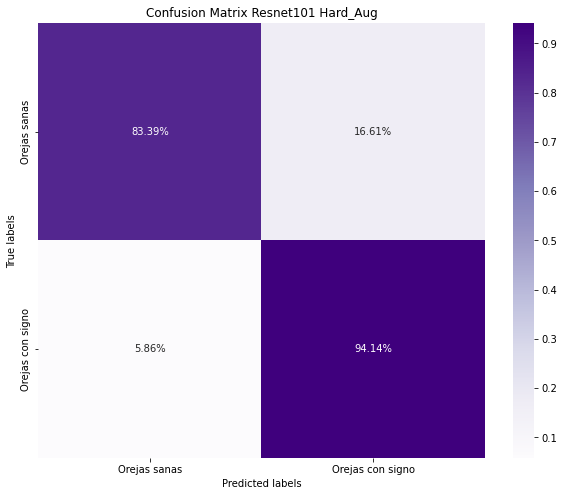

In [ ]:
generate_confusion_matrix("Resnet101 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_Resnet101.svg")

### ResNet152

In [ ]:
Resnet152_model = tf.keras.applications.ResNet152(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Resnet152_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet152.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 4.6645 - accuracy: 0.6712
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet152.h5
72/72 [==============================] - 61s 653ms/step - loss: 4.6645 - accuracy: 0.6712 - val_loss: 0.7071 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.5595 - accuracy: 0.7251
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 35s 485ms/step - loss: 0.5595 - accuracy: 0.7251 - val_loss: 0.6931 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.4682 - accuracy: 0.7977
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 35s 482ms/step - loss: 0.4682 - accuracy: 0.7977 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 4/300
72/72 [============================

In [ ]:
model.save("/content/drive/MyDrive/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet152_Model_HardAug.h")
with open('/content/drive/MyDrive/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet152_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/Resnet152_Model_HardAug.h")

In [ ]:
evaluate("Resnet152 Hard_Aug", model)

Resnet152 Hard_Aug accuracy : 93.45%
Resnet152 Hard_Aug accuracy train : 99.43%
Resnet152 Hard_Aug accuracy test : 85.74%


In [ ]:
evaluate_CheckPoint("Resnet152 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_ResNet152.h5")

Resnet152 Hard_Aug CheckPoint accuracy mc: 94.78%
Resnet152 Hard_Aug CheckPoint accuracy train mc: 99.57%
Resnet152 Hard_Aug CheckPoint accuracy test mc: 89.39%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/Resnet152_aug_hard.csv")

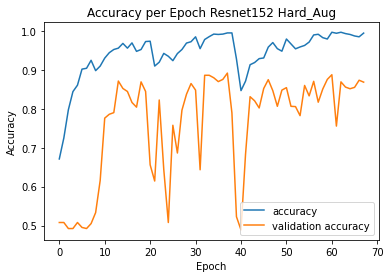

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Resnet152 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_Resnet152.svg")

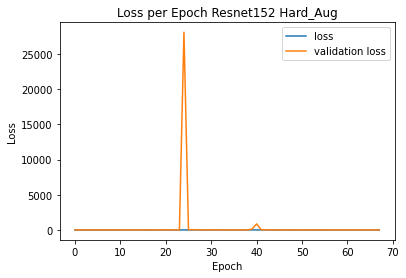

In [ ]:
generate_loss_graphs('Loss per Epoch Resnet152 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_Resnet152.svg")

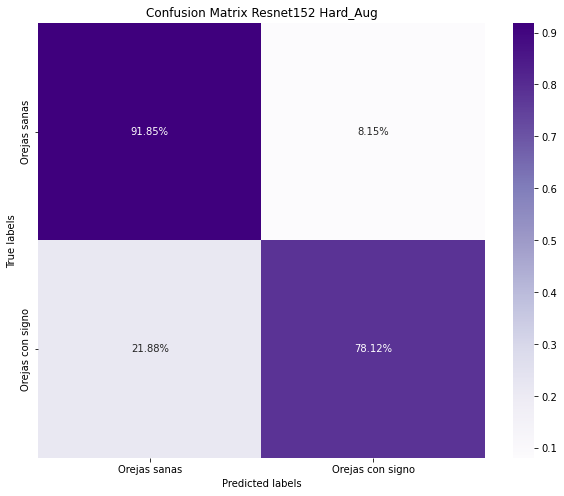

In [ ]:
generate_confusion_matrix("Resnet152 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_Resnet152.svg")

## InceptionV3

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(InceptionV3_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_InceptionV3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 2.0746 - accuracy: 0.6364
Epoch 1: val_accuracy improved from -inf to 0.69280, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_InceptionV3.h5
72/72 [==============================] - 52s 423ms/step - loss: 2.0746 - accuracy: 0.6364 - val_loss: 12.6850 - val_accuracy: 0.6928
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.3721 - accuracy: 0.8378
Epoch 2: val_accuracy improved from 0.69280 to 0.81003, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_InceptionV3.h5
72/72 [==============================] - 24s 338ms/step - loss: 0.3721 - accuracy: 0.8378 - val_loss: 1.4288 - val_accuracy: 0.8100
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.3402 - accuracy: 0.8652
Epoch 3: val_accuracy did not improve from 0.81003
72/72 [==============================] - 21s 291ms/s

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/InceptionV3_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/InceptionV3_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/InceptionV3_Model_HardAug.h")

In [ ]:
evaluate("InceptionV3 Hard_Aug", model)

InceptionV3 Hard_Aug accuracy : 97.06%
InceptionV3 Hard_Aug accuracy train : 98.96%
InceptionV3 Hard_Aug accuracy test : 96.35%


In [ ]:
evaluate_CheckPoint("InceptionV3 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_InceptionV3.h5")

InceptionV3 Hard_Aug CheckPoint accuracy mc: 97.69%
InceptionV3 Hard_Aug CheckPoint accuracy train mc: 99.87%
InceptionV3 Hard_Aug CheckPoint accuracy test mc: 94.26%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/InceptionV3_aug_hard.csv")

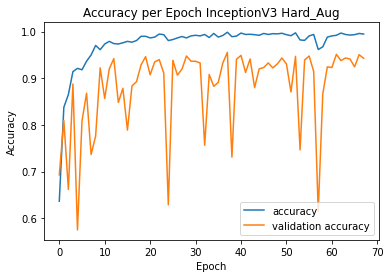

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch InceptionV3 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_InceptionV3.svg")

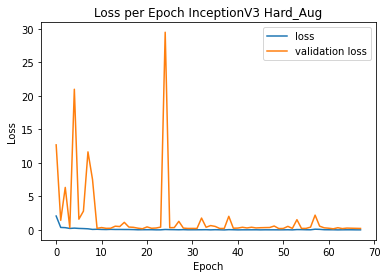

In [ ]:
generate_loss_graphs('Loss per Epoch InceptionV3 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_InceptionV3.svg")

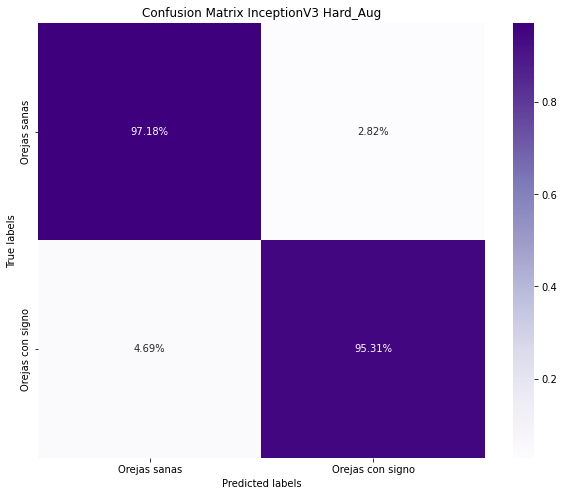

In [ ]:
generate_confusion_matrix("InceptionV3 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_InceptionV3.svg")

## MobileNet

In [ ]:
MobileNet_model = tf.keras.applications.MobileNet(
  include_top=False,
  weights="imagenet",
  input_shape=(224,224,3)
)

model = Sequential()
model.add(MobileNet_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_MobileNet.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 4.1919 - accuracy: 0.7990
Epoch 1: val_accuracy improved from -inf to 0.61935, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_MobileNet.h5
72/72 [==============================] - 24s 271ms/step - loss: 4.1919 - accuracy: 0.7990 - val_loss: 7.4473 - val_accuracy: 0.6194
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9696
Epoch 2: val_accuracy improved from 0.61935 to 0.93291, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_MobileNet.h5
72/72 [==============================] - 17s 241ms/step - loss: 0.0915 - accuracy: 0.9696 - val_loss: 0.3121 - val_accuracy: 0.9329
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9769
Epoch 3: val_accuracy improved from 0.93291 to 0.95410, saving model to /content/drive/MyDrive/TFG/PRUEBAS R

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/MobileNet_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/MobileNet_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/MobileNet_Model_HardAug.h")

In [ ]:
evaluate("MobileNet Hard_Aug", model)

MobileNet Hard_Aug accuracy : 95.73%
MobileNet Hard_Aug accuracy train : 98.22%
MobileNet Hard_Aug accuracy test : 93.57%


In [ ]:
evaluate_CheckPoint("MobileNet Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_MobileNet.h5")

MobileNet Hard_Aug CheckPoint accuracy mc: 99.02%
MobileNet Hard_Aug CheckPoint accuracy train mc: 100.00%
MobileNet Hard_Aug CheckPoint accuracy test mc: 97.74%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/MobileNet_aug_hard.csv")

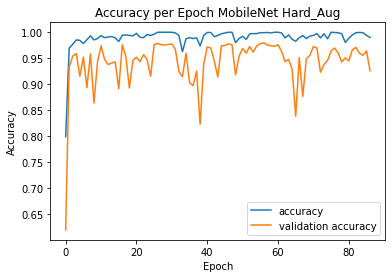

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch MobileNet Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_MobileNet.svg")

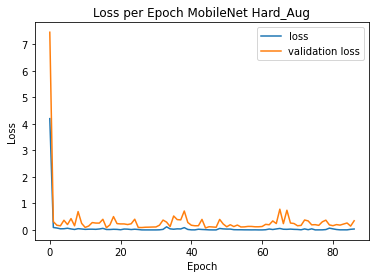

In [ ]:
generate_loss_graphs('Loss per Epoch MobileNet Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_MobileNet.svg")

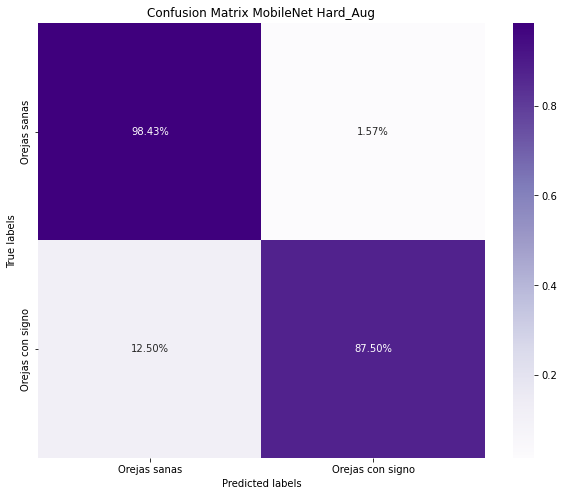

In [ ]:
generate_confusion_matrix("MobileNet Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_MobileNet.svg")

## DenseNet X

### DenseNet121

In [ ]:
DenseNet121_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

model = Sequential()
model.add(DenseNet121_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet121.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 5.7049 - accuracy: 0.5859
Epoch 1: val_accuracy improved from -inf to 0.52472, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet121.h5
72/72 [==============================] - 53s 544ms/step - loss: 5.7049 - accuracy: 0.5859 - val_loss: 96.9726 - val_accuracy: 0.5247
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 1.0149 - accuracy: 0.6590
Epoch 2: val_accuracy improved from 0.52472 to 0.57345, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet121.h5
72/72 [==============================] - 35s 486ms/step - loss: 1.0149 - accuracy: 0.6590 - val_loss: 0.6891 - val_accuracy: 0.5734
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.7390
Epoch 3: val_accuracy improved from 0.57345 to 0.73446, saving model to /content/drive/MyDrive/TFG/PRUE

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet121_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet121_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet121_Model_HardAug.h")

In [ ]:
evaluate("DenseNet121 Hard_Aug", model)

DenseNet121 Hard_Aug accuracy : 80.93%
DenseNet121 Hard_Aug accuracy train : 82.99%
DenseNet121 Hard_Aug accuracy test : 78.43%


In [ ]:
evaluate_CheckPoint("DenseNet121 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet121.h5")

DenseNet121 Hard_Aug CheckPoint accuracy mc: 96.13%
DenseNet121 Hard_Aug CheckPoint accuracy train mc: 98.87%
DenseNet121 Hard_Aug CheckPoint accuracy test mc: 92.17%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/DenseNet121_aug_hard.csv")

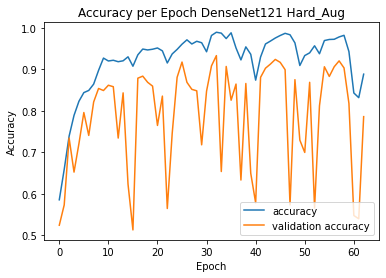

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch DenseNet121 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_DenseNet121.svg")

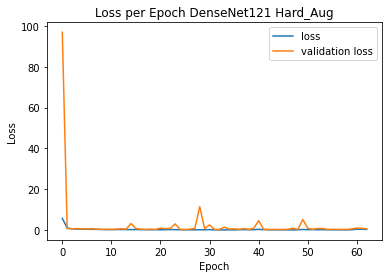

In [ ]:
generate_loss_graphs('Loss per Epoch DenseNet121 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_DenseNet121.svg")

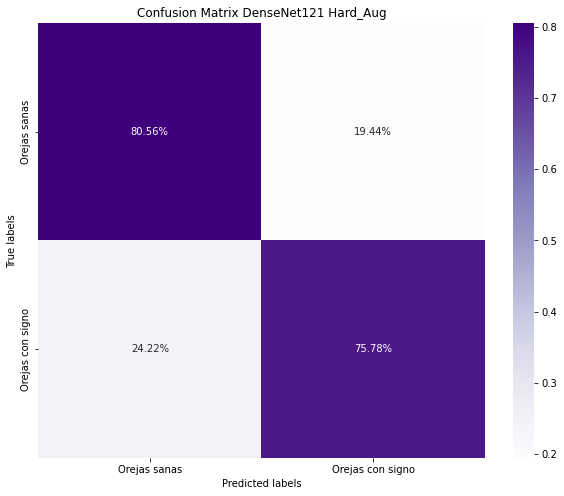

In [ ]:
generate_confusion_matrix("DenseNet121 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_DenseNet121.svg")

### DenseNet169

In [ ]:
DenseNet169_model = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

model = Sequential()
model.add(DenseNet169_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet169.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 5.0082 - accuracy: 0.5950
Epoch 1: val_accuracy improved from -inf to 0.49223, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet169.h5
72/72 [==============================] - 63s 651ms/step - loss: 5.0082 - accuracy: 0.5950 - val_loss: 16279477.0000 - val_accuracy: 0.4922
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 1.1363 - accuracy: 0.6442
Epoch 2: val_accuracy did not improve from 0.49223
72/72 [==============================] - 36s 501ms/step - loss: 1.1363 - accuracy: 0.6442 - val_loss: 8.6650 - val_accuracy: 0.4781
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.7642
Epoch 3: val_accuracy improved from 0.49223 to 0.73517, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet169.h5
72/72 [==============================] - 47s 6

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet169_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet169_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet169_Model_HardAug.h")

In [ ]:
evaluate("DenseNet169 Hard_Aug", model)

DenseNet169 Hard_Aug accuracy : 93.15%
DenseNet169 Hard_Aug accuracy train : 96.43%
DenseNet169 Hard_Aug accuracy test : 90.96%


In [ ]:
evaluate_CheckPoint("DenseNet169 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet169.h5")

DenseNet169 Hard_Aug CheckPoint accuracy mc: 95.31%
DenseNet169 Hard_Aug CheckPoint accuracy train mc: 97.17%
DenseNet169 Hard_Aug CheckPoint accuracy test mc: 93.22%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/DenseNet169_aug_hard.csv")


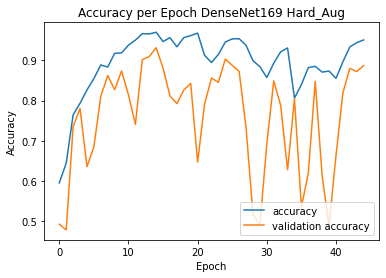

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch DenseNet169 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_DenseNet169.svg")

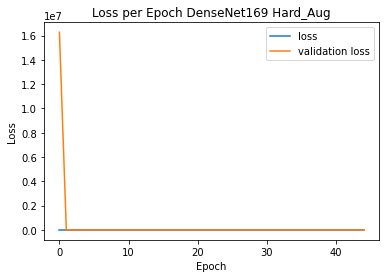

In [ ]:
generate_loss_graphs('Loss per Epoch DenseNet169 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_DenseNet169.svg")

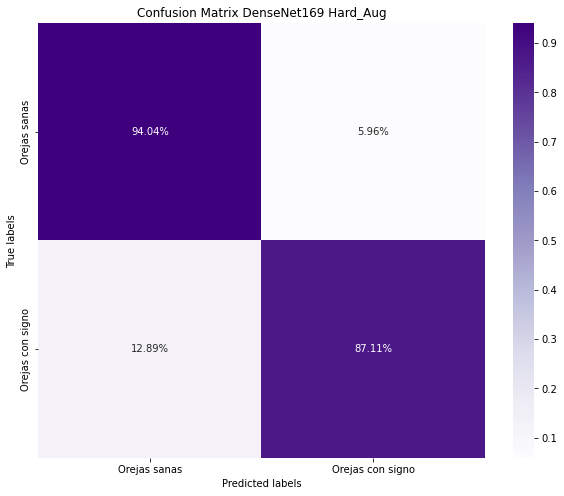

In [ ]:
generate_confusion_matrix("DenseNet169 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_DenseNet169.svg")

### DenseNet201

In [ ]:
DenseNet201_model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

model = Sequential()
model.add(DenseNet201_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet201.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 5.2163 - accuracy: 0.5346
Epoch 1: val_accuracy improved from -inf to 0.47246, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet201.h5
72/72 [==============================] - 78s 818ms/step - loss: 5.2163 - accuracy: 0.5346 - val_loss: 24.4084 - val_accuracy: 0.4725
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.8972 - accuracy: 0.6211
Epoch 2: val_accuracy improved from 0.47246 to 0.56780, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet201.h5
72/72 [==============================] - 59s 820ms/step - loss: 0.8972 - accuracy: 0.6211 - val_loss: 0.9091 - val_accuracy: 0.5678
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.7265 - accuracy: 0.7094
Epoch 3: val_accuracy improved from 0.56780 to 0.71751, saving model to /content/drive/MyDrive/TFG/PRUE

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet201_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet201_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet201_Model_HardAug', 'rb'))

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/DenseNet201_Model_HardAug.h")

In [ ]:
evaluate("DenseNet201 Hard_Aug", model)

DenseNet201 Hard_Aug accuracy : 96.76%
DenseNet201 Hard_Aug accuracy train : 99.48%
DenseNet201 Hard_Aug accuracy test : 95.13%


In [ ]:
evaluate_CheckPoint("DenseNet201 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_DenseNet201.h5")

DenseNet201 Hard_Aug CheckPoint accuracy mc: 96.71%
DenseNet201 Hard_Aug CheckPoint accuracy train mc: 99.61%
DenseNet201 Hard_Aug CheckPoint accuracy test mc: 93.74%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/DenseNet201_aug_hard.csv")

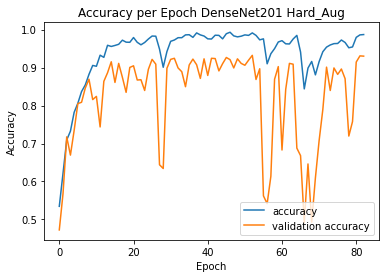

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch DenseNet201 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_DenseNet201.svg")

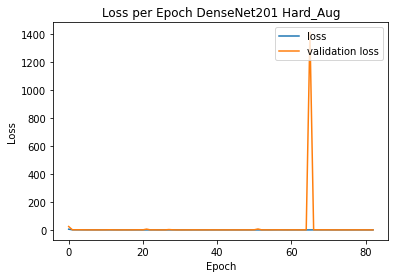

In [ ]:
generate_loss_graphs('Loss per Epoch DenseNet201 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_DenseNet201.svg")

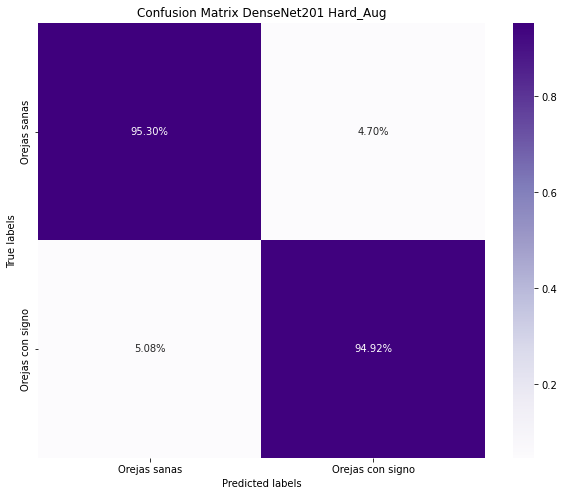

In [ ]:
generate_confusion_matrix("DenseNet201 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_DenseNet201.svg")

## EfficientNetBX

### EfficientNetB0

In [ ]:
EfficientNetB0_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(EfficientNetB0_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_EfficientNetB0.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 1.0577 - accuracy: 0.7903
Epoch 1: val_accuracy improved from -inf to 0.49223, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_EfficientNetB0.h5
72/72 [==============================] - 43s 334ms/step - loss: 1.0577 - accuracy: 0.7903 - val_loss: 0.8700 - val_accuracy: 0.4922
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.1314 - accuracy: 0.9513
Epoch 2: val_accuracy improved from 0.49223 to 0.50918, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_EfficientNetB0.h5
72/72 [==============================] - 21s 286ms/step - loss: 0.1314 - accuracy: 0.9513 - val_loss: 10.5851 - val_accuracy: 0.5092
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9804
Epoch 3: val_accuracy improved from 0.50918 to 0.53037, saving model to /content/drive/MyDrive/TF

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/EfficientNetB0_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/EfficientNetB0_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/EfficientNetB0_Model_HardAug.h")

In [ ]:
evaluate("EfficientNetB0 Hard_Aug", model)

EfficientNetB0 Hard_Aug accuracy : 52.49%
EfficientNetB0 Hard_Aug accuracy train : 52.41%
EfficientNetB0 Hard_Aug accuracy test : 56.17%


In [ ]:
evaluate_CheckPoint("EfficientNetB0 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_EfficientNetB0.h5")

EfficientNetB0 Hard_Aug CheckPoint accuracy: 98.62%
EfficientNetB0 Hard_Aug CheckPoint accuracy train: 100.00%
EfficientNetB0 Hard_Aug CheckPoint accuracy test: 97.22%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/EfficientNetB0_aug_hard.csv")

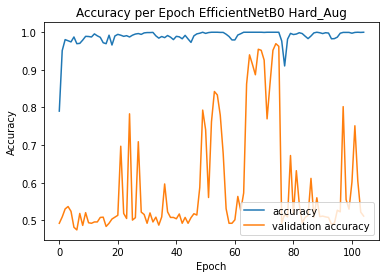

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch EfficientNetB0 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_EfficientNetB0.svg")

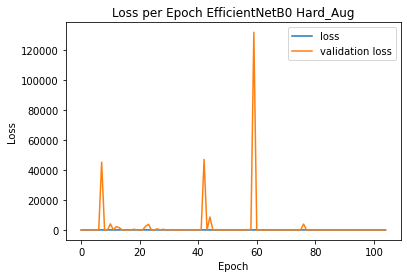

In [ ]:
generate_loss_graphs('Loss per Epoch EfficientNetB0 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_EfficientNetB0.svg")

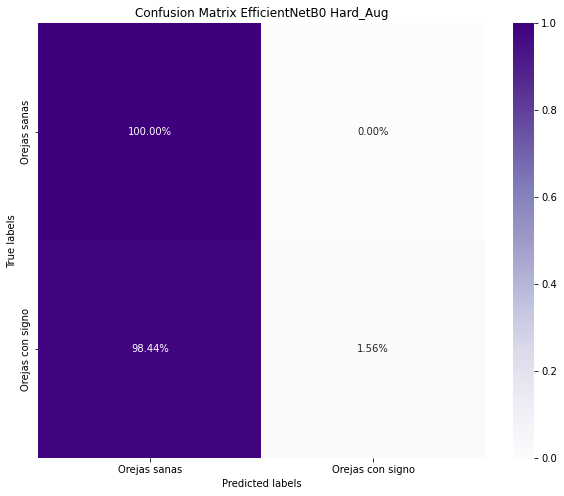

In [ ]:
generate_confusion_matrix("EfficientNetB0 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_EfficientNetB0.svg")

### EfficientNetB2

In [ ]:
EfficientNetB2_model = tf.keras.applications.EfficientNetB2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(EfficientNetB2_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_EfficientNetB2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es, mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.9090 - accuracy: 0.8199
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_EfficientNetB2.h5
72/72 [==============================] - 47s 472ms/step - loss: 0.9090 - accuracy: 0.8199 - val_loss: 0.7762 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.1318 - accuracy: 0.9517
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 27s 371ms/step - loss: 0.1318 - accuracy: 0.9517 - val_loss: 3.2607 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9765
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 27s 371ms/step - loss: 0.0698 - accuracy: 0.9765 - val_loss: 2.6849 - val_accuracy: 0.5078
Epoch 4/300
72/72 [=======================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/EfficientNetB2_Model_HardAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/EfficientNetB2_Model_HardAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/EfficientNetB2_Model_HardAug.h")

In [ ]:
evaluate("EfficientNetB2 Hard_Aug", model)

EfficientNetB2 Hard_Aug accuracy : 52.17%
EfficientNetB2 Hard_Aug accuracy train : 52.20%
EfficientNetB2 Hard_Aug accuracy test : 55.48%


In [ ]:
evaluate_CheckPoint("EfficientNetB2 Hard_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Hard/best_model_EfficientNetB2.h5")

In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug/EfficientNetB2_aug_hard.csv")

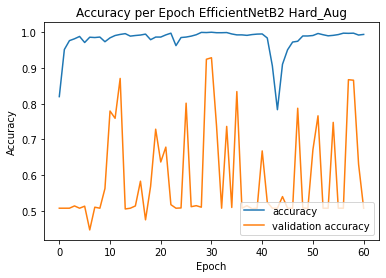

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch EfficientNetB2 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Accuracy_EfficientNetB2.svg")

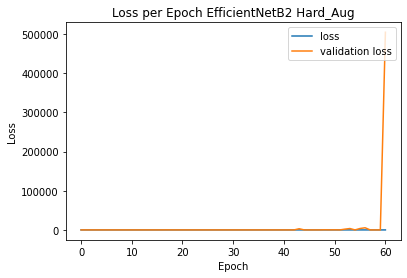

In [ ]:
generate_loss_graphs('Loss per Epoch EfficientNetB2 Hard_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/Loss_EfficientNetB2.svg")

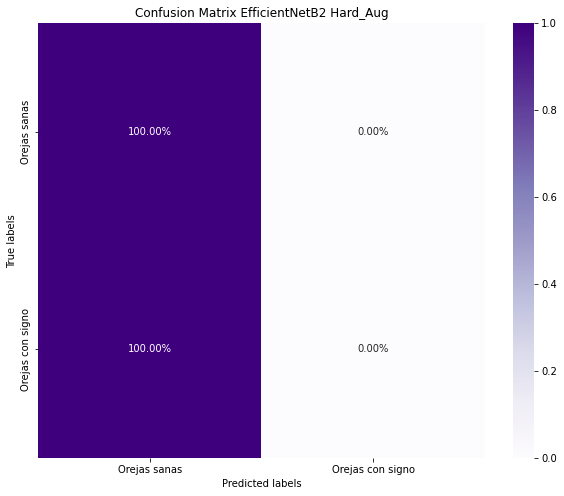

In [ ]:
generate_confusion_matrix("EfficientNetB2 Hard_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Hard_Aug/CM_EfficientNetB2.svg")

# MODELS WITH SOFT AUGMENTATION

## Xception 

In [ ]:
Xception_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Xception_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Xception.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.7591 - accuracy: 0.5254
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Xception.h5
72/72 [==============================] - 55s 545ms/step - loss: 0.7591 - accuracy: 0.5254 - val_loss: 0.7109 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.5929
Epoch 2: val_accuracy improved from 0.50777 to 0.52895, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Xception.h5
72/72 [==============================] - 40s 555ms/step - loss: 0.6885 - accuracy: 0.5929 - val_loss: 14.0842 - val_accuracy: 0.5290
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.5803 - accuracy: 0.7425
Epoch 3: val_accuracy improved from 0.52895 to 0.71540, saving model to /content/drive/MyDrive/TFG/PRUEBAS RE

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Xception_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Xception_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Xception_Model_SoftAug.h")

In [ ]:
evaluate('Xception Soft_Aug', model)

Xception Soft_Aug accuracy : 95.10%
Xception Soft_Aug accuracy train : 96.00%
Xception Soft_Aug accuracy test : 94.09%


In [ ]:
evaluate_CheckPoint("Xception Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Xception.h5")

Xception Soft_Aug CheckPoint accuracy: 99.56%
Xception Soft_Aug CheckPoint accuracy train: 100.00%
Xception Soft_Aug CheckPoint accuracy test: 98.78%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/Xception_aug_soft.csv")

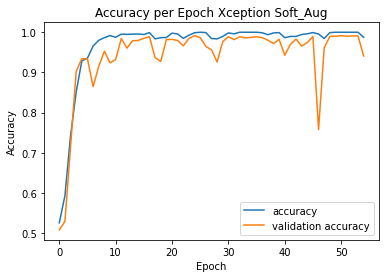

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Xception Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_Xception.svg")

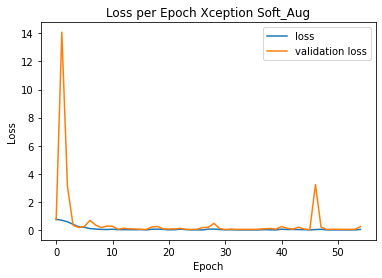

In [ ]:
generate_loss_graphs('Loss per Epoch Xception Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_Xception.svg")

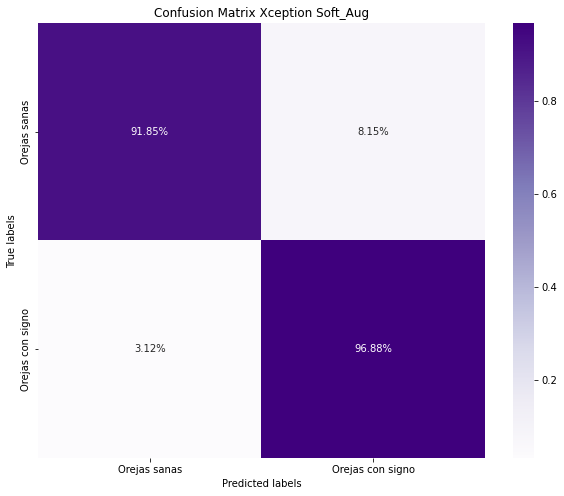

In [ ]:
generate_confusion_matrix("Xception Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_Xception.svg")

## VGG X

### VGG16

In [ ]:
Vgg16_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Vgg16_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Vgg16.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.9350 - accuracy: 0.5937
Epoch 1: val_accuracy improved from -inf to 0.51130, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Vgg16.h5
72/72 [==============================] - 26s 320ms/step - loss: 0.9350 - accuracy: 0.5937 - val_loss: 1.8150 - val_accuracy: 0.5113
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.7916 - accuracy: 0.6425
Epoch 2: val_accuracy did not improve from 0.51130
72/72 [==============================] - 19s 269ms/step - loss: 0.7916 - accuracy: 0.6425 - val_loss: 112.6460 - val_accuracy: 0.5106
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.6975 - accuracy: 0.6581
Epoch 3: val_accuracy did not improve from 0.51130
72/72 [==============================] - 20s 273ms/step - loss: 0.6975 - accuracy: 0.6581 - val_loss: 5.9816 - val_accuracy: 0.5064
Epoch 4/300
72/72 [==============================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg16_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg16_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg16_Model_SoftAug.h")

In [ ]:
evaluate('Vgg16 Soft_Aug', model)

Vgg16 Soft_Aug accuracy : 96.48%
Vgg16 Soft_Aug accuracy train : 98.91%
Vgg16 Soft_Aug accuracy test : 93.91%


In [ ]:
evaluate_CheckPoint("Vgg16 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Vgg16.h5")

In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/Vgg16_aug_soft.csv")

In [ ]:
graphic = pickle.load(open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg16_Model_SoftAug', 'rb'))

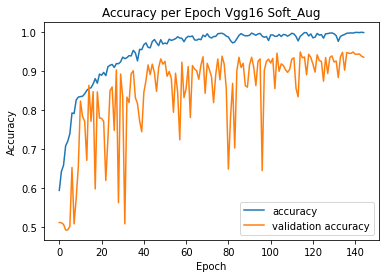

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Vgg16 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_Vgg16.svg")

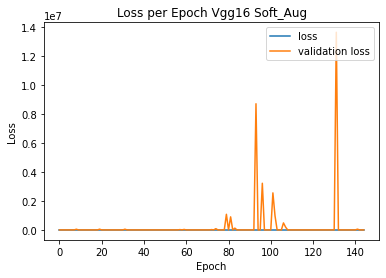

In [ ]:
generate_loss_graphs('Loss per Epoch Vgg16 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_Vgg16.svg")

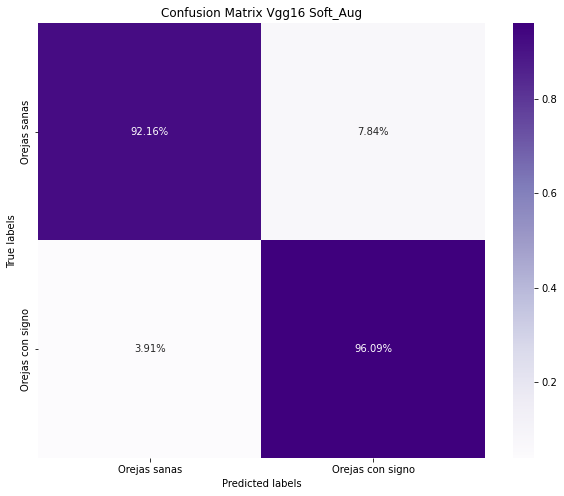

In [ ]:
generate_confusion_matrix("Vgg16 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_Vgg16.svg")

### VGG19

In [ ]:
Vgg19_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

model = Sequential()
model.add(Vgg19_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Vgg19.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.8860 - accuracy: 0.6046
Epoch 1: val_accuracy improved from -inf to 0.49223, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Vgg19.h5
72/72 [==============================] - 43s 412ms/step - loss: 0.8860 - accuracy: 0.6046 - val_loss: 33.8085 - val_accuracy: 0.4922
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.7738 - accuracy: 0.6538
Epoch 2: val_accuracy improved from 0.49223 to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Vgg19.h5
72/72 [==============================] - 28s 387ms/step - loss: 0.7738 - accuracy: 0.6538 - val_loss: 986.4901 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.7177
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 23s 315ms/step - loss

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg19_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg19_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg19_Model_SoftAug.h/assets


In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Vgg19_Model_SoftAug.h")

In [ ]:
evaluate('Vgg19 Soft_Aug', model)

Vgg19 Soft_Aug accuracy : 95.15%
Vgg19 Soft_Aug accuracy train : 98.17%
Vgg19 Soft_Aug accuracy test : 92.70%


In [ ]:
evaluate_CheckPoint("Vgg19 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Vgg19.h5")

Vgg19 Soft_Aug CheckPoint accuracy: 97.48%
Vgg19 Soft_Aug CheckPoint accuracy train: 99.96%
Vgg19 Soft_Aug CheckPoint accuracy test: 95.30%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/Vgg19_aug_soft.csv")

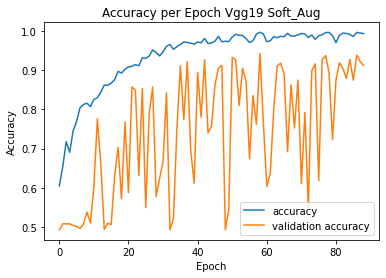

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Vgg19 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_Vgg19.svg")

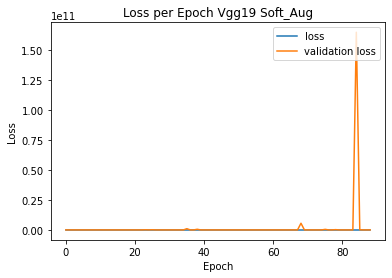

In [ ]:
generate_loss_graphs('Loss per Epoch Vgg19 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_Vgg19.svg")

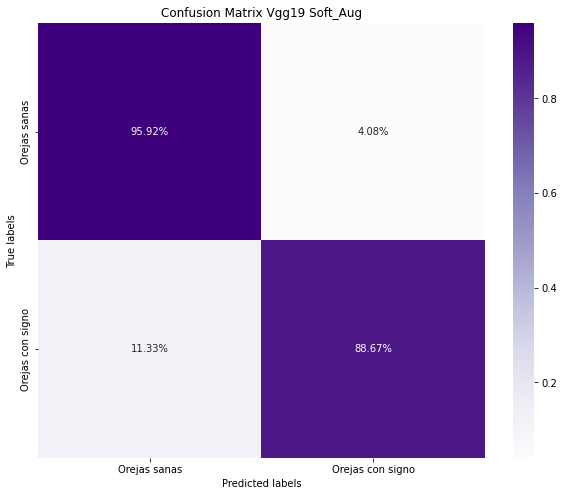

In [ ]:
generate_confusion_matrix("Vgg19 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_Vgg19.svg")

## ResNet X

### ResNet50

In [ ]:
Resnet50_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)

model = Sequential()
model.add(Resnet50_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet50.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 3.1347 - accuracy: 0.7216
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet50.h5
72/72 [==============================] - 29s 322ms/step - loss: 3.1347 - accuracy: 0.7216 - val_loss: 3.0031 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.5279 - accuracy: 0.8195
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 15s 214ms/step - loss: 0.5279 - accuracy: 0.8195 - val_loss: 1.2359 - val_accuracy: 0.4922
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8895
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 15s 215ms/step - loss: 0.3180 - accuracy: 0.8895 - val_loss: 0.8628 - val_accuracy: 0.4922
Epoch 4/300
72/72 [=============================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet50_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet50_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet50_Model_SoftAug.h")

In [ ]:
evaluate('Resnet50 Soft_Aug', model)

Resnet50 Soft_Aug accuracy : 98.14%
Resnet50 Soft_Aug accuracy train : 100.00%
Resnet50 Soft_Aug accuracy test : 95.83%


In [ ]:
evaluate_CheckPoint("Resnet50 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet50.h5")

Resnet50 Soft_Aug CheckPoint accuracy: 98.16%
Resnet50 Soft_Aug CheckPoint accuracy train: 100.00%
Resnet50 Soft_Aug CheckPoint accuracy test: 94.43%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/Resnet50_aug_soft.csv")

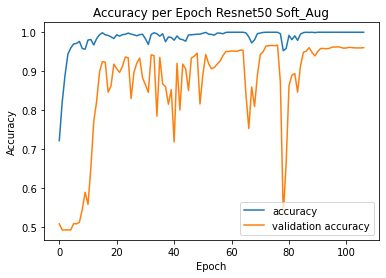

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Resnet50 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_Resnet50.svg")

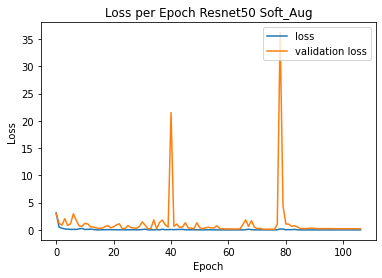

In [ ]:
generate_loss_graphs('Loss per Epoch Resnet50 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_Resnet50.svg")

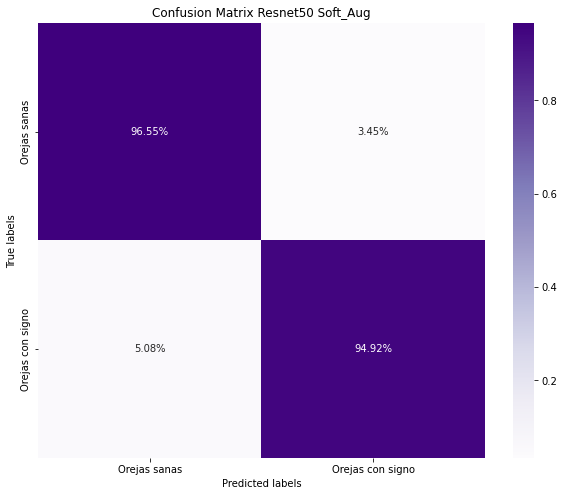

In [ ]:
generate_confusion_matrix("Resnet50 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_Resnet50.svg")

### ResNet101

In [ ]:
Resnet101_model = tf.keras.applications.ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Resnet101_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet101.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 3.7039 - accuracy: 0.6668
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet101.h5
72/72 [==============================] - 44s 472ms/step - loss: 3.7039 - accuracy: 0.6668 - val_loss: 0.9553 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.7795
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 25s 344ms/step - loss: 0.5544 - accuracy: 0.7795 - val_loss: 2.0635 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8552
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 25s 346ms/step - loss: 0.3408 - accuracy: 0.8552 - val_loss: 0.7943 - val_accuracy: 0.5078
Epoch 4/300
72/72 [============================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet101_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet101_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet101_Model_SoftAug.h/assets
INFO:tensorflow:Assets written to: ram://b576224a-8dbd-4f58-b187-eab18a4c907e/assets


In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet101_Model_SoftAug.h")

In [ ]:
evaluate('Resnet101 Soft_Aug', model)

Resnet101 Soft_Aug accuracy : 97.46%
Resnet101 Soft_Aug accuracy train : 100.00%
Resnet101 Soft_Aug accuracy test : 94.78%


In [ ]:
evaluate_CheckPoint("Resnet101 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet101.h5")

Resnet101 Soft_Aug CheckPoint accuracy: 97.53%
Resnet101 Soft_Aug CheckPoint accuracy train: 100.00%
Resnet101 Soft_Aug CheckPoint accuracy test: 94.61%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/Resnet101_aug_soft.csv")

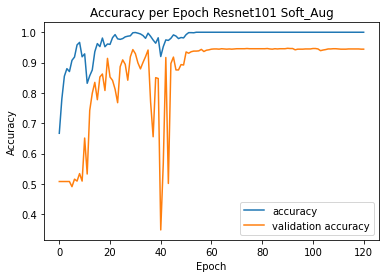

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Resnet101 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_Resnet101.svg")

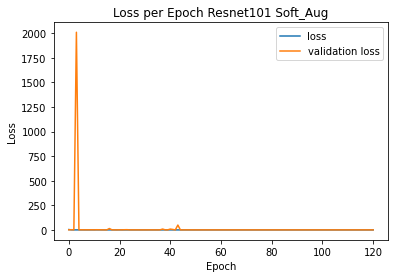

In [ ]:
generate_loss_graphs('Loss per Epoch Resnet101 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_Resnet101.svg")

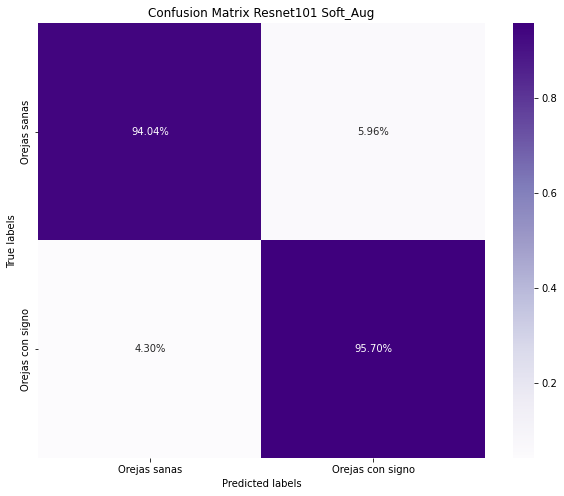

In [ ]:
generate_confusion_matrix("Resnet101 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_Resnet101.svg")

### ResNet152

In [ ]:
Resnet152_model = tf.keras.applications.ResNet152(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(Resnet152_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet152.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 3.7234 - accuracy: 0.7377
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet152.h5
72/72 [==============================] - 65s 667ms/step - loss: 3.7234 - accuracy: 0.7377 - val_loss: 3446.4377 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.4172 - accuracy: 0.8291
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 35s 484ms/step - loss: 0.4172 - accuracy: 0.8291 - val_loss: 2.6985 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.2789 - accuracy: 0.8969
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 35s 482ms/step - loss: 0.2789 - accuracy: 0.8969 - val_loss: 1.2509 - val_accuracy: 0.5078
Epoch 4/300
72/72 [=========================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet152_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet152_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/Resnet152_Model_SoftAug.h")

In [ ]:
evaluate('Resnet152 Soft_Aug', model)

Resnet152 Soft_Aug accuracy : 97.81%
Resnet152 Soft_Aug accuracy train : 100.00%
Resnet152 Soft_Aug accuracy test : 95.13%


In [ ]:
evaluate_CheckPoint("Resnet152 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_Resnet152.h5")

Resnet152 Soft_Aug CheckPoint accuracy: 98.30%
Resnet152 Soft_Aug CheckPoint accuracy train: 100.00%
Resnet152 Soft_Aug CheckPoint accuracy test: 96.17%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/Resnet152_aug_soft.csv")

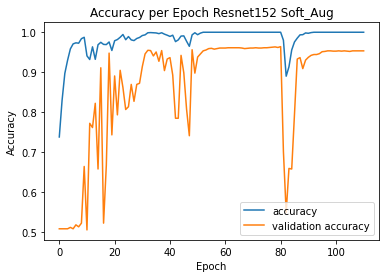

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch Resnet152 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_Resnet152.svg")

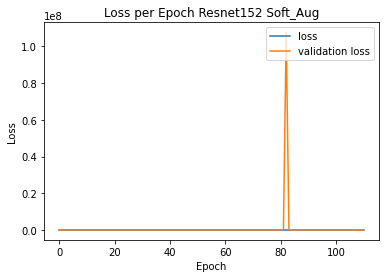

In [ ]:
generate_loss_graphs('Loss per Epoch Resnet152 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_Resnet152.svg")

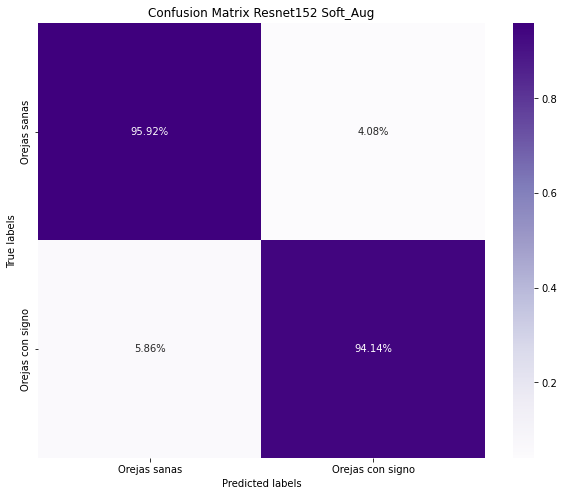

In [ ]:
generate_confusion_matrix("Resnet152 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_Resnet152.svg")

## InceptionV3

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(InceptionV3_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_InceptionV3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 2.1917 - accuracy: 0.6129
Epoch 1: val_accuracy improved from -inf to 0.51695, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_InceptionV3.h5
72/72 [==============================] - 41s 282ms/step - loss: 2.1917 - accuracy: 0.6129 - val_loss: 12.9275 - val_accuracy: 0.5169
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.3996 - accuracy: 0.8234
Epoch 2: val_accuracy improved from 0.51695 to 0.77331, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_InceptionV3.h5
72/72 [==============================] - 17s 232ms/step - loss: 0.3996 - accuracy: 0.8234 - val_loss: 0.5362 - val_accuracy: 0.7733
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.9117
Epoch 3: val_accuracy improved from 0.77331 to 0.86723, saving model to /content/drive/MyDrive/TFG/PRUE

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/InceptionV3_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/InceptionV3_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic.history, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/InceptionV3_Model_SoftAug.h")

In [ ]:
evaluate('InceptionV3 Soft_Aug', model)

InceptionV3 Soft_Aug accuracy : 98.88%
InceptionV3 Soft_Aug accuracy train : 99.96%
InceptionV3 Soft_Aug accuracy test : 97.57%


In [ ]:
evaluate_CheckPoint("InceptionV3 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_InceptionV3.h5")

InceptionV3 Soft_Aug CheckPoint accuracy: 99.18%
InceptionV3 Soft_Aug CheckPoint accuracy train: 100.00%
InceptionV3 Soft_Aug CheckPoint accuracy test: 97.91%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/InceptionV3_aug_soft.csv")

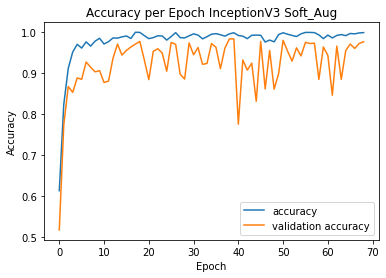

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch InceptionV3 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_InceptionV3.svg")

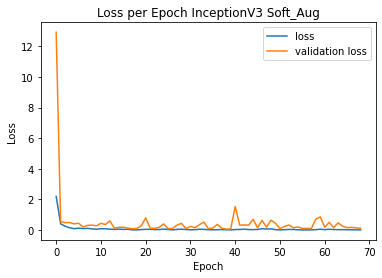

In [ ]:
generate_loss_graphs('Loss per Epoch InceptionV3 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_InceptionV3.svg")

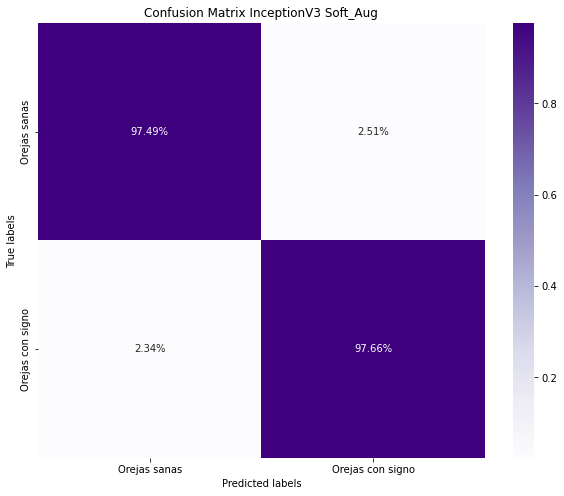

In [ ]:
generate_confusion_matrix("InceptionV3 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_InceptionV3.svg")

## MobileNet

In [ ]:
MobileNet_model = tf.keras.applications.MobileNet(
  include_top=False,
  weights="imagenet",
  input_shape=(224,224,3)
)

model = Sequential()
model.add(MobileNet_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_MobileNet.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 4.0738 - accuracy: 0.8182
Epoch 1: val_accuracy improved from -inf to 0.58051, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_MobileNet.h5
72/72 [==============================] - 21s 223ms/step - loss: 4.0738 - accuracy: 0.8182 - val_loss: 5.6844 - val_accuracy: 0.5805
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9783
Epoch 2: val_accuracy improved from 0.58051 to 0.88489, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_MobileNet.h5
72/72 [==============================] - 14s 201ms/step - loss: 0.0641 - accuracy: 0.9783 - val_loss: 0.5727 - val_accuracy: 0.8849
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9861
Epoch 3: val_accuracy did not improve from 0.88489
72/72 [==============================] - 12s 168ms/step -

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/MobileNet_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/MobileNet_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/MobileNet_Model_SoftAug.h")

In [ ]:
evaluate('MobileNet Soft_Aug', model)

MobileNet Soft_Aug accuracy : 98.74%
MobileNet Soft_Aug accuracy train : 99.57%
MobileNet Soft_Aug accuracy test : 96.70%


In [ ]:
evaluate_CheckPoint("MobileNet Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_MobileNet.h5")

MobileNet Soft_Aug CheckPoint accuracy: 99.63%
MobileNet Soft_Aug CheckPoint accuracy train: 100.00%
MobileNet Soft_Aug CheckPoint accuracy test: 98.61%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/MobileNet_aug_soft.csv")

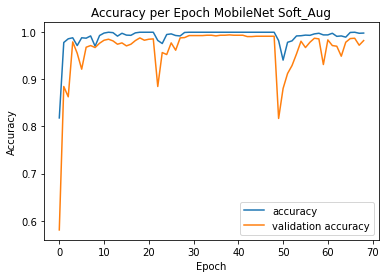

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch MobileNet Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_MobileNet.svg")

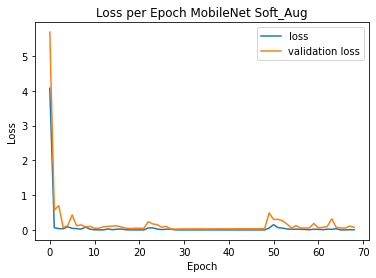

In [ ]:
generate_loss_graphs('Loss per Epoch MobileNet Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_MobileNet.svg")

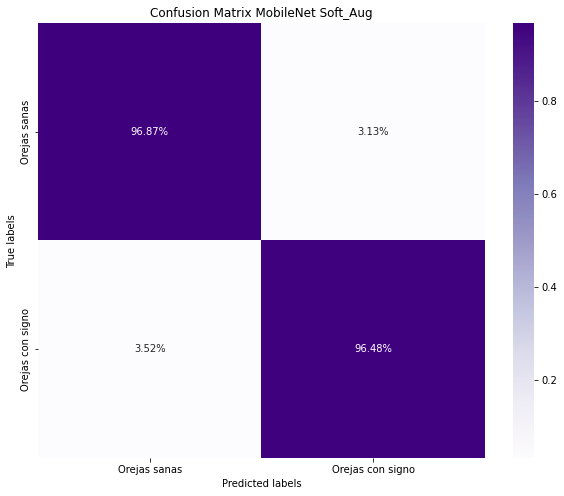

In [ ]:
generate_confusion_matrix("MobileNet Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_MobileNet.svg")

## DenseNet X

### DenseNet121

In [ ]:
DenseNet121_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

model = Sequential()
model.add(DenseNet121_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet121.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 5.8390 - accuracy: 0.6168
Epoch 1: val_accuracy improved from -inf to 0.52472, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet121.h5
72/72 [==============================] - 39s 342ms/step - loss: 5.8390 - accuracy: 0.6168 - val_loss: 82.6737 - val_accuracy: 0.5247
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 1.1080 - accuracy: 0.7425
Epoch 2: val_accuracy improved from 0.52472 to 0.62853, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet121.h5
72/72 [==============================] - 21s 290ms/step - loss: 1.1080 - accuracy: 0.7425 - val_loss: 1.7711 - val_accuracy: 0.6285
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.5718 - accuracy: 0.8247
Epoch 3: val_accuracy improved from 0.62853 to 0.69280, saving model to /content/drive/MyDrive/TFG/PRUE

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet121_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet121_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet121_Model_SoftAug.h")

In [ ]:
evaluate('DenseNet121 Soft_Aug', model)

DenseNet121 Soft_Aug accuracy : 96.41%
DenseNet121 Soft_Aug accuracy train : 97.35%
DenseNet121 Soft_Aug accuracy test : 95.48%


In [ ]:
evaluate_CheckPoint("DenseNet121 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet121.h5")

DenseNet121 Soft_Aug CheckPoint accuracy: 99.81%
DenseNet121 Soft_Aug CheckPoint accuracy train: 100.00%
DenseNet121 Soft_Aug CheckPoint accuracy test: 99.13%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/DenseNet121_aug_soft.csv")

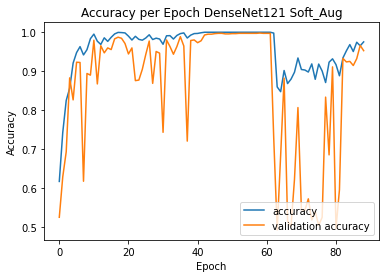

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch DenseNet121 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_DenseNet121.svg")

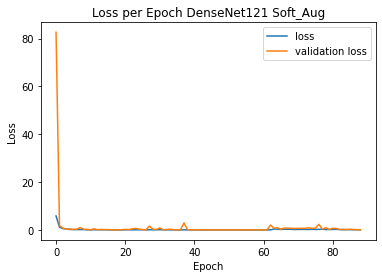

In [ ]:
generate_loss_graphs('Loss per Epoch DenseNet121 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_DenseNet121.svg")

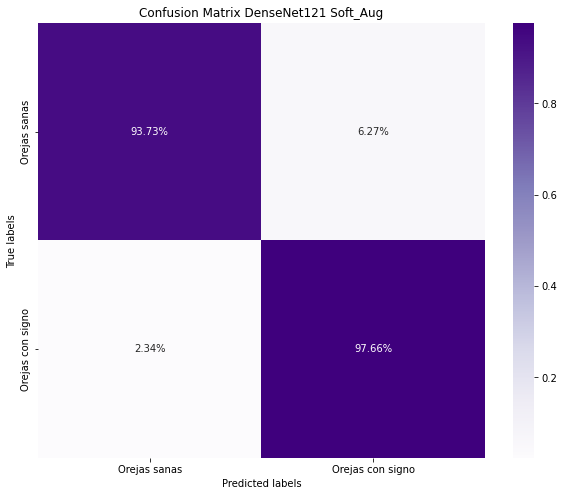

In [ ]:
generate_confusion_matrix("DenseNet121 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_DenseNet121.svg")

### DenseNet169

In [ ]:
DenseNet169_model = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

model = Sequential()
model.add(DenseNet169_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet169.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 5.3661 - accuracy: 0.4959
Epoch 1: val_accuracy improved from -inf to 0.49506, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet169.h5
72/72 [==============================] - 54s 452ms/step - loss: 5.3661 - accuracy: 0.4959 - val_loss: 222.9307 - val_accuracy: 0.4951
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.6778 - accuracy: 0.5794
Epoch 2: val_accuracy improved from 0.49506 to 0.53814, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet169.h5
72/72 [==============================] - 28s 394ms/step - loss: 0.6778 - accuracy: 0.5794 - val_loss: 0.7099 - val_accuracy: 0.5381
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.5880 - accuracy: 0.7225
Epoch 3: val_accuracy improved from 0.53814 to 0.69421, saving model to /content/drive/MyDrive/TFG/PRU

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet169_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet169_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet169_Model_SoftAug.h")

In [ ]:
evaluate('DenseNet169 Soft_Aug', model)

DenseNet169 Soft_Aug accuracy : 88.65%
DenseNet169 Soft_Aug accuracy train : 89.87%
DenseNet169 Soft_Aug accuracy test : 88.17%


In [ ]:
evaluate_CheckPoint("DenseNet169 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet169.h5")

DenseNet169 Soft_Aug CheckPoint accuracy: 98.48%
DenseNet169 Soft_Aug CheckPoint accuracy train: 99.83%
DenseNet169 Soft_Aug CheckPoint accuracy test: 95.83%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/DenseNet169_aug_soft.csv")

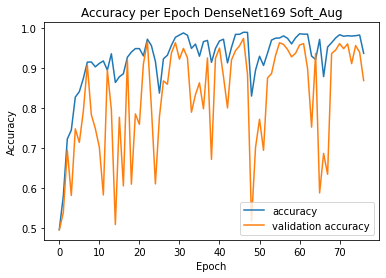

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch DenseNet169 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_DenseNet169.svg")

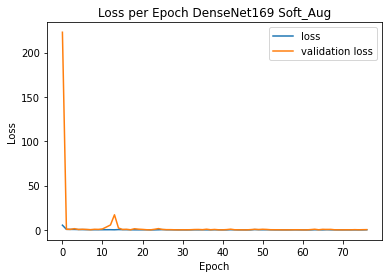

In [ ]:
generate_loss_graphs('Loss per Epoch DenseNet169 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_DenseNet169.svg")

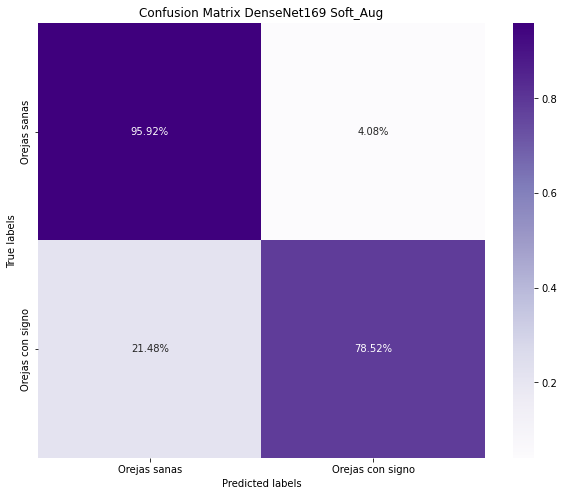

In [ ]:
generate_confusion_matrix("DenseNet169 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_DenseNet169.svg")

### DenseNet201

In [ ]:
DenseNet201_model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

model = Sequential()
model.add(DenseNet201_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet201.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 5.1332 - accuracy: 0.6037
Epoch 1: val_accuracy improved from -inf to 0.50494, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet201.h5
72/72 [==============================] - 67s 570ms/step - loss: 5.1332 - accuracy: 0.6037 - val_loss: 84292.3438 - val_accuracy: 0.5049
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.6742
Epoch 2: val_accuracy improved from 0.50494 to 0.55791, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet201.h5
72/72 [==============================] - 35s 488ms/step - loss: 0.6789 - accuracy: 0.6742 - val_loss: 62.9327 - val_accuracy: 0.5579
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.4965 - accuracy: 0.7599
Epoch 3: val_accuracy improved from 0.55791 to 0.59040, saving model to /content/drive/MyDrive/TFG/

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet201_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet201_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet201_Model_SoftAug.h")

In [ ]:
evaluate('DenseNet201 Soft_Aug', model)

DenseNet201 Soft_Aug accuracy : 52.14%
DenseNet201 Soft_Aug accuracy train : 52.20%
DenseNet201 Soft_Aug accuracy test : 55.30%


In [ ]:
evaluate_CheckPoint("DenseNet201 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet201.h5")

In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/DenseNet201_aug_soft.csv")

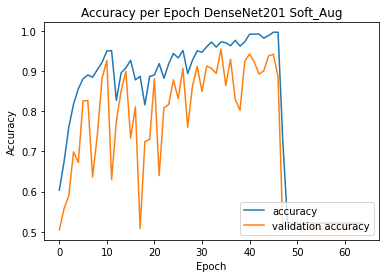

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch DenseNet201 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_DenseNet201.svg")

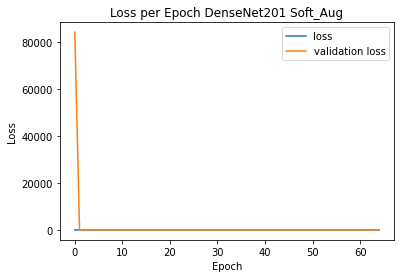

In [ ]:
generate_loss_graphs('Loss per Epoch DenseNet201 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_DenseNet201.svg")

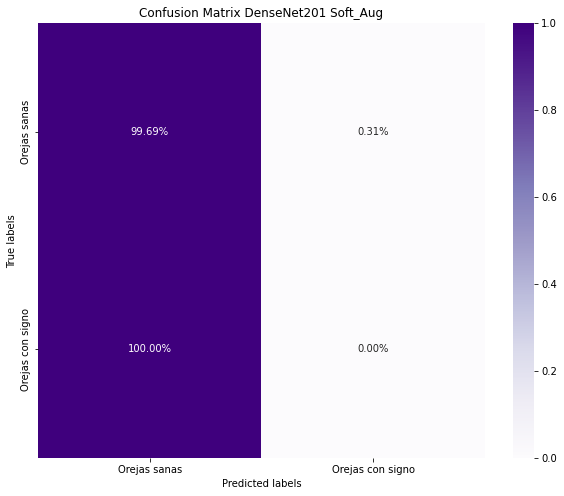

In [ ]:
generate_confusion_matrix("DenseNet201 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_DenseNet201.svg")

### Prueba Version 2 de DenseNet201

In [ ]:
DenseNet201_model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

model = Sequential()
model.add(DenseNet201_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet201_Version2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.7820 - accuracy: 0.7112
Epoch 1: val_accuracy improved from -inf to 0.60876, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet201_Version2.h5
72/72 [==============================] - 103s 934ms/step - loss: 0.7820 - accuracy: 0.7112 - val_loss: 15.0879 - val_accuracy: 0.6088
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.8321 - accuracy: 0.7264
Epoch 2: val_accuracy did not improve from 0.60876
72/72 [==============================] - 47s 652ms/step - loss: 0.8321 - accuracy: 0.7264 - val_loss: 7260232.5000 - val_accuracy: 0.4922
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.9795 - accuracy: 0.5981
Epoch 3: val_accuracy did not improve from 0.60876
72/72 [==============================] - 47s 658ms/step - loss: 0.9795 - accuracy: 0.5981 - val_loss: 2370.4805 - val_accuracy: 0.4922
Epoch 4/300
72/72 [======

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet201_Model_SoftAug_Version2.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet201_Model_SoftAug_Version2', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/DenseNet201_Model_SoftAug_Version2.h")

In [ ]:
evaluate('DenseNet201 Version 2 Soft_Aug', model)

DenseNet201 Version 2 Soft_Aug accuracy : 95.03%
DenseNet201 Version 2 Soft_Aug accuracy train : 96.91%
DenseNet201 Version 2 Soft_Aug accuracy test : 93.39%


In [ ]:
evaluate_CheckPoint("DenseNet201 V2 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_DenseNet201_Version2.h5")

In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/DenseNet201_Version2_aug_soft.csv")

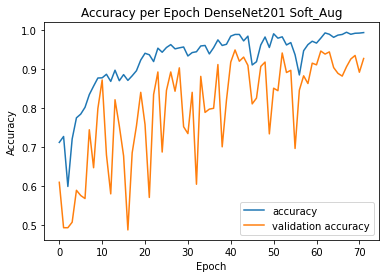

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch DenseNet201 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_DenseNet201_Version2.svg")

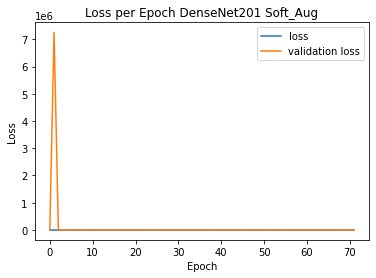

In [ ]:
generate_loss_graphs('Loss per Epoch DenseNet201 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_DenseNet201_Version2.svg")

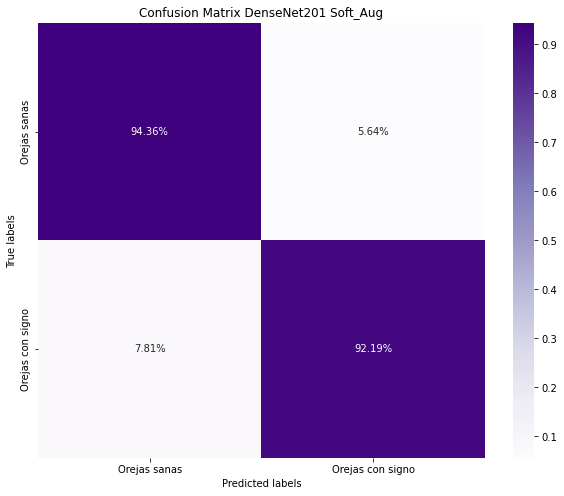

In [ ]:
generate_confusion_matrix("DenseNet201 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_DenseNet201_Version2.svg")

## EfficientNetBX

### EfficientNetB0

In [ ]:
EfficientNetB0_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)


model = Sequential()
model.add(EfficientNetB0_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_EfficientNetB0.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 0.8412 - accuracy: 0.8199
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_EfficientNetB0.h5
72/72 [==============================] - 47s 343ms/step - loss: 0.8412 - accuracy: 0.8199 - val_loss: 11.6318 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.1140 - accuracy: 0.9609
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 18s 253ms/step - loss: 0.1140 - accuracy: 0.9609 - val_loss: 13.9391 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9839
Epoch 3: val_accuracy did not improve from 0.50777
72/72 [==============================] - 18s 253ms/step - loss: 0.0428 - accuracy: 0.9839 - val_loss: 10.3398 - val_accuracy: 0.5078
Epoch 4/300
72/72 [====================

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/EfficientNetB0_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/EfficientNetB0_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/EfficientNetB0_Model_SoftAug.h")

In [ ]:
evaluate('EfficientNetB0 Soft_Aug', model)

EfficientNetB0 Soft_Aug accuracy : 52.66%
EfficientNetB0 Soft_Aug accuracy train : 52.68%
EfficientNetB0 Soft_Aug accuracy test : 56.17%


In [ ]:
evaluate_CheckPoint("EfficientNetB0 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_EfficientNetB0.h5")

In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/EfficientNetB0_aug_soft.csv")

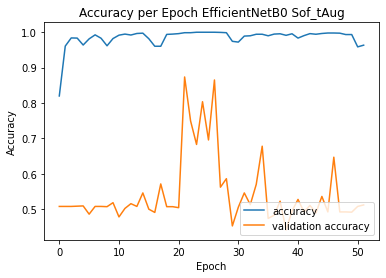

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch EfficientNetB0 Sof_tAug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_EfficientNetB0.svg")

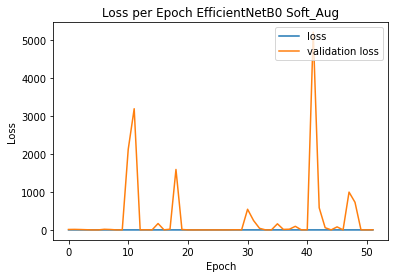

In [ ]:
generate_loss_graphs('Loss per Epoch EfficientNetB0 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_EfficientNetB0.svg")

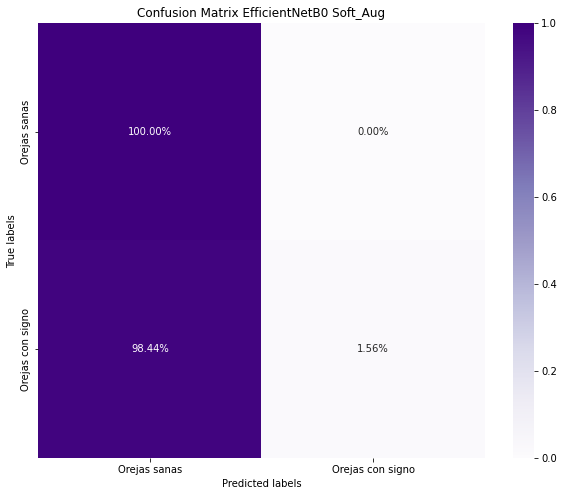

In [ ]:
generate_confusion_matrix("EfficientNetB0 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_EfficientNetB0.svg")

### EfficientNetB2

In [ ]:
EfficientNetB2_model = tf.keras.applications.EfficientNetB2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

model = Sequential()
model.add(EfficientNetB2_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_EfficientNetB2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
graphic = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_val, y_val),
    callbacks=[es,mc]
)

Epoch 1/300
72/72 [==============================] - ETA: 0s - loss: 1.0820 - accuracy: 0.8230
Epoch 1: val_accuracy improved from -inf to 0.50777, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_EfficientNetB2.h5
72/72 [==============================] - 49s 480ms/step - loss: 1.0820 - accuracy: 0.8230 - val_loss: 3.0393 - val_accuracy: 0.5078
Epoch 2/300
72/72 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9774
Epoch 2: val_accuracy did not improve from 0.50777
72/72 [==============================] - 27s 377ms/step - loss: 0.0722 - accuracy: 0.9774 - val_loss: 5.3338 - val_accuracy: 0.5078
Epoch 3/300
72/72 [==============================] - ETA: 0s - loss: 0.0334 - accuracy: 0.9843
Epoch 3: val_accuracy improved from 0.50777 to 0.53531, saving model to /content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_EfficientNetB2.h5
72/72 [==============================] - 35s 49

In [ ]:
model.save("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/EfficientNetB2_Model_SoftAug.h")
with open('/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/EfficientNetB2_Model_SoftAug', 'wb') as file_pi:
  pickle.dump(graphic, file_pi)

In [ ]:
model = load_model("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/EfficientNetB2_Model_SoftAug.h")

In [ ]:
evaluate("EfficientNetB2 Soft_aAug", model)

EfficientNetB2 Soft_aAug accuracy : 63.38%
EfficientNetB2 Soft_aAug accuracy train : 63.07%
EfficientNetB2 Soft_aAug accuracy test : 62.26%


In [ ]:
evaluate_CheckPoint("EfficientNetB2 Soft_Aug CheckPoint","/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Ficheros_Modelos_Red_Soft/best_model_EfficientNetB2.h5")

EfficientNetB2 Soft_Aug CheckPoint accuracy: 93.38%
EfficientNetB2 Soft_Aug CheckPoint accuracy train: 93.91%
EfficientNetB2 Soft_Aug CheckPoint accuracy test: 92.70%


In [ ]:
save_predict("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug/EfficientNetB2_aug_soft.csv")

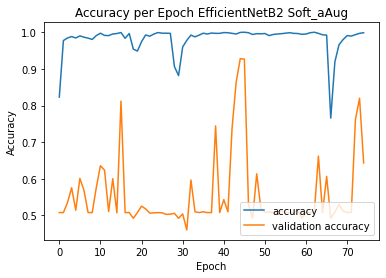

In [ ]:
generate_accuracy_graphs('Accuracy per Epoch EfficientNetB2 Soft_aAug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Accuracy_EfficientNetB2.svg")

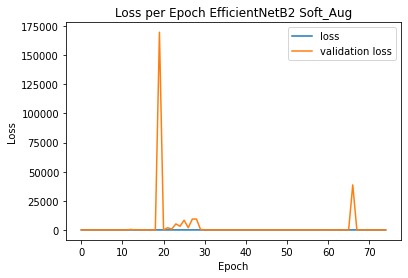

In [ ]:
generate_loss_graphs('Loss per Epoch EfficientNetB2 Soft_Aug', "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/Loss_EfficientNetB2.svg")

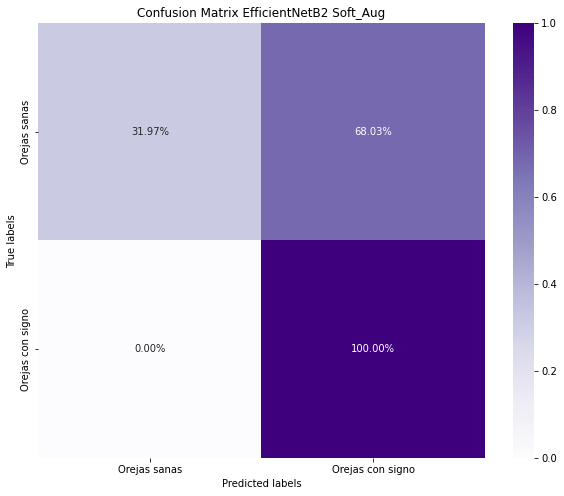

In [ ]:
generate_confusion_matrix("EfficientNetB2 Soft_Aug", model, "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Graficas_Modelos/Graficas_Soft_Aug/CM_EfficientNetB2.svg")

# ROC CURVE function 


In [ ]:
from sklearn.metrics import roc_curve, auc
import csv
import numpy as np
import pandas as pd
import os
def generate_roc_curve_graphs(csvPath, csvPath2):

  # Define a result table as a DataFrame
  result_table = pd.DataFrame(columns=['Models', 'fpr','tpr','auc'])
  result_table_2 = pd.DataFrame(columns=['Models', 'fpr','tpr','auc'])
  for file_name in os.listdir(csvPath):
    path = os.path.join(csvPath, file_name)

    with open(path, mode='r') as predict_data:
      csv_reader = csv.reader(predict_data, delimiter=',')
      line_count = 0
      real_labels = []
      predict_labels  = []
      

      for row in csv_reader:
        if line_count != 0:
          real_labels.append(int(row[2]))
          predict_labels.append(int(row[3]))
          
        line_count += 1
      
      fpr, tpr, threshold = roc_curve(real_labels, predict_labels)
      auc_score = auc(fpr, tpr)

      result_table = result_table.append({'Models':file_name.split('_')[0],
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc_score}, ignore_index=True)
  
  for file_name in os.listdir(csvPath2):
    path = os.path.join(csvPath2, file_name)

    with open(path, mode='r') as predict_data:
      csv_reader = csv.reader(predict_data, delimiter=',')
      line_count = 0
      real_labels = []
      predict_labels  = []
      

      for row in csv_reader:
        if line_count != 0:
          real_labels.append(int(row[2]))
          predict_labels.append(int(row[3]))
          
        line_count += 1
      
      fpr, tpr, threshold = roc_curve(real_labels, predict_labels)
      auc_score = auc(fpr, tpr)

      result_table_2 = result_table_2.append({'Models': file_name.split('_')[0],
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc_score}, ignore_index=True)
      
  
  # Set name of the classifiers as index labels
  result_table.set_index('Models', inplace=True)
  result_table_2.set_index('Models', inplace=True)

  color_list = ["red", "darkorange", "gold", 
                "olivedrab", "seagreen","royalblue", 
                "darkviolet", "violet", "mediumaquamarine",
                "lightcoral","maroon","dimgray","steelblue"]
  plt.figure(figsize=(26, 8))
  plt.subplot(1, 2, 1) 
  for c, i in enumerate(result_table.index):
      plt.plot(result_table.loc[i]['fpr'], 
              result_table.loc[i]['tpr'],
              color = color_list[c], 
              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
      
  plt.plot([0,1], [0,1], color='orange', linestyle='--')


  plt.xlabel("False Positive Rate", fontsize=15)

  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Hard_Aug Models', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')


  plt.subplot(1, 2, 2) 
  for c, i in enumerate(result_table_2.index):
      plt.plot(result_table_2.loc[i]['fpr'], 
              result_table_2.loc[i]['tpr'],
              color = color_list[c], 
              label="{}, AUC={:.3f}".format(i, result_table_2.loc[i]['auc']))
      
  plt.plot([0,1], [0,1], color='orange', linestyle='--')


  plt.xlabel("False Positive Rate", fontsize=15)

  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Soft_Aug Models', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()

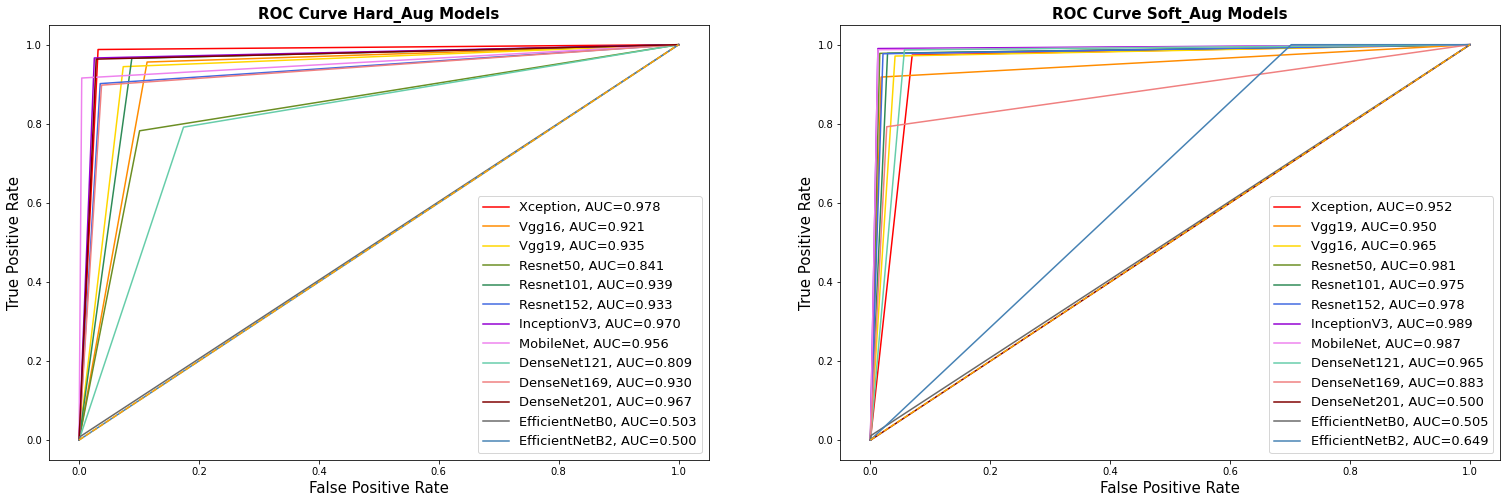

In [ ]:
generate_roc_curve_graphs("/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Hard_Aug", "/content/drive/MyDrive/TFG/PRUEBAS REDES OREJAS V2/Predicts_Soft_Aug")